# **Computational Linguistics 23/24 Final Project** <br>
Name: Ho-Hsuan Wang <br>
Student Number: 7038925 <br>
Date: 22nd March <br>

In [ ]:
import requests

In [ ]:
links_to_datasets = {
    "test": "https://raw.githubusercontent.com/UniversalDependencies/UD_Chinese-GSD/master/zh_gsd-ud-test.conllu",
}

def download_and_parse(url):
    response = requests.get(url)
    response.raise_for_status()
    file_content = response.text
    parsed_data = parse(file_content)
    return parsed_data

def parse(content):
    sentences = content.split('\n\n')
    parsed_data = {}
    current_text = ''
    for sentence in sentences:
        lines = sentence.split('\n')
        for line in lines:
            if line.startswith('# text = '):
                current_text = line.replace('# text = ', '')
                parsed_data[current_text] = {}
            elif not line.startswith('#') and line:
                parts = line.split('\t')
                if len(parts) == 10:  # Ensuring it's a valid token line
                    token, upos = parts[1], parts[3]
                    parsed_data[current_text][token] = upos
    return parsed_data


def download_and_parse(url):
    response = requests.get(url)
    response.raise_for_status()
    file_content = response.text
    return parse(file_content)

parsed_data = download_and_parse(links_to_datasets["test"])

first_sentence = next(iter(parsed_data))
tokens_pos_tags = parsed_data[first_sentence]

print(f"Sentence: {first_sentence}")
print("Tokens and POS tags:")
for token, pos_tag in tokens_pos_tags.items():
    print(f"{token}: {pos_tag}")

Sentence: 然而，這樣的處理也衍生了一些問題。
Tokens and POS tags:
然而: SCONJ
，: PUNCT
這樣: PRON
的: PART
處理: NOUN
也: SCONJ
衍生: VERB
了: AUX
一些: ADJ
問題: NOUN
。: PUNCT


In [ ]:
def extract_unique_upos_tags(parsed_data):
    upos_tags = set()
    for sentence in parsed_data.values():
        for pos_tag in sentence.values():
            upos_tags.add(pos_tag)
    return upos_tags

# Extract and print all unique UPOS tags
unique_upos_tags = extract_unique_upos_tags(parsed_data)
print("Unique UPOS tags in the dataset:")
for tag in unique_upos_tags:
    print(tag)

Unique UPOS tags in the dataset:
VERB
AUX
PROPN
NOUN
ADV
PUNCT
NUM
X
PART
SYM
ADP
SCONJ
DET
ADJ
CCONJ
PRON


In [ ]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
! pip install tqdm

In [ ]:
import time
import openai
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
def query_gpt4(prompt):
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4-0125-preview",
            messages=[{"role": "system", "content": "You are a helpful tokenization and pos tagging assistant."}, # a context-setting mechanism for GPT-4
                      {"role": "user", "content": prompt}]
        )
        return response.choices[0].message['content']
    except Exception as e:
        print("Error querying OpenAI API:", e)
        return None

In [ ]:
openai.api_key = "my_openai_api_key"

In [ ]:
print(parsed_data.items())

dict_items([('然而，這樣的處理也衍生了一些問題。', {'然而': 'SCONJ', '，': 'PUNCT', '這樣': 'PRON', '的': 'PART', '處理': 'NOUN', '也': 'SCONJ', '衍生': 'VERB', '了': 'AUX', '一些': 'ADJ', '問題': 'NOUN', '。': 'PUNCT'}), ('自從2004年提出了興建人文大樓的構想，企業界陸續有人提供捐款。', {'自從': 'ADP', '2004': 'NUM', '年': 'NOUN', '提出': 'VERB', '了': 'AUX', '興建': 'VERB', '人文': 'PROPN', '大樓': 'NOUN', '的': 'SCONJ', '構想': 'NOUN', '，': 'PUNCT', '企業': 'NOUN', '界': 'PART', '陸續': 'ADV', '有': 'VERB', '人': 'NOUN', '提供': 'VERB', '捐款': 'NOUN', '。': 'PUNCT'}), ('杜鵑花為溫帶植物，台北雖然在亞熱帶，但冬季的東北季風卻使得杜鵑花在臺大宜然自得。', {'杜鵑花': 'NOUN', '為': 'AUX', '溫帶': 'NOUN', '植物': 'NOUN', '，': 'PUNCT', '台北': 'PROPN', '雖然': 'ADP', '在': 'VERB', '亞': 'PART', '熱帶': 'NOUN', '但': 'SCONJ', '冬季': 'NOUN', '的': 'PART', '東北': 'NOUN', '季風': 'NOUN', '卻': 'SCONJ', '使得': 'VERB', '臺大': 'PROPN', '宜然自得': 'VERB', '。': 'PUNCT'}), ('臺大醫學人文博物館是一棟兩層樓的建築，沿中山南路與仁愛路成L型。', {'臺大': 'PROPN', '醫學': 'NOUN', '人文': 'NOUN', '博物': 'NOUN', '館': 'PART', '是': 'AUX', '一': 'NUM', '棟': 'NOUN', '兩': 'NUM', '層': 'NOUN', '樓': 'NOUN', '的

In [ ]:
def create_tokenization_prompt(sentence):
    prompt = (
        "Tokenization splits words and punctuation in a sentence, keeping meaningful words intact.\n"
        "For example, if we tokenize the following Chinese sentence: 看似簡單，只是二選一做決擇，但其實他們代表的是你周遭的親朋好友，試著給你不同的意見，\n"
        "the tokenized result is: 看似, 簡單, ，, 只, 是, 二, 選, 一, 做, 決擇, ，, 但, 其實, 他們, 代表, 的, 是, 你, 周遭, 的, 親朋, 好友, ，, 試, 著, 給, 你, 不同, 的, 意見, 。\n"
        "Now, please tokenize the following Chinese sentence in the same way:\n"
        f"{sentence}\n"
        "Output only the tokenized result separated by commas.\n"
    )
    return prompt

def create_pos_prompt(sentence, tokens):
    pos_tags_full = {
        "SYM": "Symbol",
        "ADP": "Adposition",
        "ADV": "Adverb",
        "AUX": "Auxiliary",
        "PRON": "Pronoun",
        "PUNCT": "Punctuation",
        "PART": "Particle",
        "SCONJ": "Subordinating Conjunction",
        "DET": "Determiner",
        "X": "Other",
        "NOUN": "Noun",
        "NUM": "Numeral",
        "PROPN": "Proper Noun",
        "ADJ": "Adjective",
        "CCONJ": "Coordinating Conjunction",
        "VERB": "Verb"
    }

    corpus_info = (
        "Note: '不, 了, 事' are often tagged as PART, "
        "'之, 他, 她' as PRON, and '一切, 全, 每' as DET. Some lemmas like '了' and '是' can be AUX or VERB based on context."
    )

    example = (
        "For example, the sentence '然而，這樣的處理也衍生了一些問題。' would be tokenized and tagged as follows:\n"
        "然而: Subordinating Conjunction (SCONJ), ，: Punctuation (PUNCT), 這樣: Pronoun (PRON), 的: Particle (PART), 處理: Noun (NOUN), "
        "也: Subordinating Conjunction (SCONJ), 衍生: Verb (VERB), 了: Auxiliary (AUX), 一些: Adjective (ADJ), 問題: Noun (NOUN), 。: Punctuation (PUNCT)\n"
        "Now, for the following tokenized Chinese sentence, provide the POS tags."
    )

    prompt = f"{corpus_info}\n{example}\n"
    prompt += "The possible tags with their full names are: " + ", ".join([f"{tag} ({full_name})" for tag, full_name in pos_tags_full.items()]) + ".\n"
    prompt += "Here is the tokenized sentence:\n"
    prompt += ", ".join(tokens) + "\n"
    prompt += 'Output only the POS tags (short forms: "SYM", "ADP", "ADV", "AUX", "PRON", "PUNCT", "PART", "SCONJ", "DET", "X", "NOUN", "NUM", "PROPN", "ADJ", "CCONJ", "VERB") separated by commas and in the same order as the words.\n'
    return prompt


# Function to calculate accuracy
def calculate_accuracy(reference, response):
    reference_list = reference.split(', ')
    response_list = response.split(', ')
    correct = sum(1 for ref, resp in zip(reference_list, response_list) if ref == resp)
    return correct / len(reference_list) if reference_list else 0

In [ ]:
test_sentence = "大多數的加長型禮車則是租車公司的財產。" # the second sentence in the dev dataset
tokenization_prompt = create_tokenization_prompt(test_sentence)

tokenized_result = query_gpt4(tokenization_prompt)
tokens = ["大", "多數", "的", "加長", "型", "禮車", "則是", "租車", "公司", "的", "財產", "。"]
pos_prompt = create_pos_prompt(test_sentence, tokens)
pos_tagging_result = query_gpt4(pos_prompt)

print(f"Example Tokenized result: {tokenized_result}")
print(f"Example POS tagging result: {pos_tagging_result}")


Example Tokenized result: 大多數, 的, 加長型, 禮車, 則, 是, 租車, 公司, 的, 財產, 。
Example POS tagging result: ADJ, NOUN, PART, ADJ, NOUN, NOUN, VERB, NOUN, NOUN, PART, NOUN, PUNCT


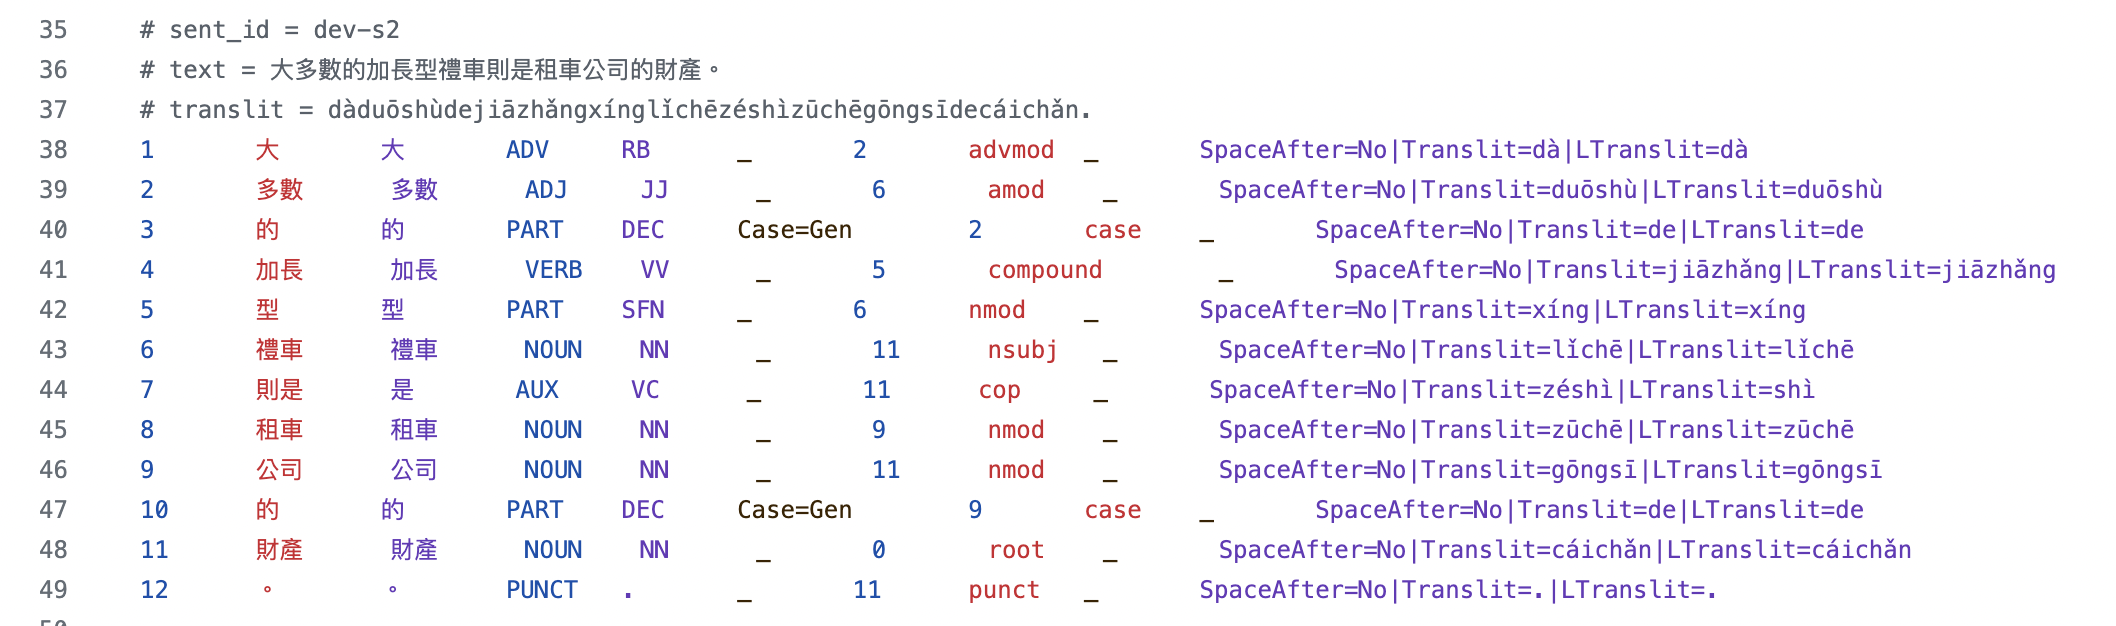

Computing POS Tagging Accuracy: 100%|██████████| 200/200 [08:40<00:00,  2.60s/it]


Overall Tokenization Accuracy: 0.34002453784528647
Overall POS Tagging Accuracy: 0.747498147971163


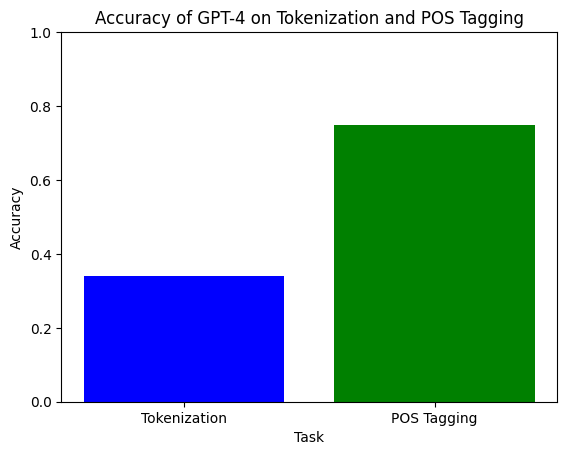

In [ ]:
# Tokenization Accuracy
tokenization_accuracy = []
for sentence, tokens_pos in tqdm(list(parsed_data.items())[:200], desc="Computing Tokenization Accuracy"):
    prompt = create_tokenization_prompt(sentence)
    response = query_gpt4(prompt)
    if response:
        tokens = [token for token in tokens_pos.keys()]
        accuracy = calculate_accuracy(", ".join(tokens), response)
        tokenization_accuracy.append(accuracy)

# POS Tagging Accuracy
pos_tagging_accuracy = []
for sentence, tokens_pos in tqdm(list(parsed_data.items())[:200], desc="Computing POS Tagging Accuracy"):
    tokens = [token for token in tokens_pos.keys()]
    prompt = create_pos_prompt(sentence, tokens)
    response = query_gpt4(prompt)
    if response:
        pos_tags = [pos for pos in tokens_pos.values()]
        accuracy = calculate_accuracy(", ".join(pos_tags), response)
        pos_tagging_accuracy.append(accuracy)

# Calculating and printing overall accuracies
overall_tokenization_accuracy = sum(tokenization_accuracy) / len(tokenization_accuracy) if tokenization_accuracy else 0
overall_pos_tagging_accuracy = sum(pos_tagging_accuracy) / len(pos_tagging_accuracy) if pos_tagging_accuracy else 0

print("Overall Tokenization Accuracy:", overall_tokenization_accuracy)
print("Overall POS Tagging Accuracy:", overall_pos_tagging_accuracy)

tasks = ['Tokenization', 'POS Tagging']
accuracies = [overall_tokenization_accuracy, overall_pos_tagging_accuracy]

plt.bar(tasks, accuracies, color=['blue', 'green'])
plt.xlabel('Task')
plt.ylabel('Accuracy')
plt.title('Accuracy of GPT-4 on Tokenization and POS Tagging')
plt.ylim(0, 1)
plt.show()

## Prompts: Zero-shot & CoT

In [ ]:

def create_tokenization_prompt_zero_shot(sentence, _unused=None):
    prompt = (
        f"Tokenize the following Chinese sentence:\n"
        f"{sentence}\n"
        "Output the tokenized result separated by commas.\n"
    )
    return prompt


def create_pos_prompt_zero_shot(sentence, tokens):
    pos_tags = [
        "SYM", "ADP", "ADV", "AUX", "PRON", "PUNCT", "PART", "SCONJ",
        "DET", "X", "NOUN", "NUM", "PROPN", "ADJ", "CCONJ", "VERB"
    ]

    prompt = (
        "Here is the tokenized Chinese sentence:\n"
        f"{', '.join(tokens)}\n"
        "Tag each token with the correct part of speech from the following list:\n"
        f"{', '.join(pos_tags)}\n"
        "Output only the POS tags separated by commas and in the same order as the tokens.\n"
    )
    return prompt



def create_tokenization_prompt_cot(sentence, _unused=None):
    prompt = (
        "Tokenization is the process of splitting a sentence into meaningful units such as words and punctuation. "
        "Let's break down the process step by step using an example sentence in Chinese.\n"
        "Consider the sentence: 看似簡單，只是二選一做決擇。First, identify independent words and symbols. "
        "For instance, 看似 is a word that means 'seems' and is kept together because it forms a single concept. "
        "Similarly, 簡單 means 'simple' and is another unit. Punctuation like ， is separated as it marks the sentence boundary.\n"
        "Following this logic, the tokenized result is: 看似, 簡單, ，, 只, 是, 二, 選, 一, 做, 決擇, 。\n"
        "Now, using the same thought process, please tokenize the following Chinese sentence:\n"
        f"{sentence}\n"
        "Output only the tokenized result separated by commas.\n"
    )
    return prompt



def create_pos_prompt_cot(sentence, tokens):
    pos_tags_full = {
        "SYM": "Symbol",
        "ADP": "Adposition",
        "ADV": "Adverb",
        "AUX": "Auxiliary",
        "PRON": "Pronoun",
        "PUNCT": "Punctuation",
        "PART": "Particle",
        "SCONJ": "Subordinating Conjunction",
        "DET": "Determiner",
        "X": "Other",
        "NOUN": "Noun",
        "NUM": "Numeral",
        "PROPN": "Proper Noun",
        "ADJ": "Adjective",
        "CCONJ": "Coordinating Conjunction",
        "VERB": "Verb"
    }

    corpus_info = (
        "POS (Part of Speech) tagging is the process of labeling tokens with their corresponding part of speech. "
        "This helps in understanding the role of each word in a sentence. For example, nouns are subjects or objects, verbs express actions, and adjectives describe nouns.\n"
        "Let's analyze the sentence '然而，這樣的處理也衍生了一些問題。' step by step. '然而' is a subordinating conjunction (SCONJ) as it connects clauses. '處理' is a noun (NOUN) because it represents an entity or concept. The process continues for each token to assign the correct tag.\n"
        "Now, apply the same method to tag the following tokenized sentence."
    )

    prompt = f"{corpus_info}\n"
    prompt += "The possible tags with their full names are: " + ", ".join([f"{tag} ({full_name})" for tag, full_name in pos_tags_full.items()]) + ".\n"
    prompt += "Here is the tokenized sentence:\n"
    prompt += ", ".join(tokens) + "\n"
    prompt += 'Output only the POS tags (short forms) separated by commas and in the same order as the words.\n'
    return prompt


Computing Tokenization Accuracy: 100%|██████████| 200/200 [15:43<00:00,  4.72s/it]


Tokenization Accuracy (Zero-Shot): 0.12


Computing POS Tagging Accuracy:   6%|▌         | 11/200 [00:39<13:35,  4.31s/it]

Error querying OpenAI API: The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Mon, 11 Mar 2024 18:44:47 GMT', 'Content-Type': 'application/json', 'Content-Length': '176', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'openai-model': 'gpt-4-0125-preview', 'openai-organization': 'user-wf7pwixluoj4qa1k2kzjziuw', 'openai-processing-ms': '3970', 'openai-version': '2020-10-01', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-ratelimit-limit-requests': '500', 'x-ratelimit-limit-tokens': '300000', 'x-ratelimit-remaining-requests': '499', 'x-ratelimit-remaining-tokens': '299868', 'x-ratelimit-res

Computing POS Tagging Accuracy:  12%|█▏        | 23/200 [01:19<06:30,  2.20s/it]

Error querying OpenAI API: The server is overloaded or not ready yet.


Computing POS Tagging Accuracy:  20%|█▉        | 39/200 [02:03<06:36,  2.46s/it]

Error querying OpenAI API: The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Mon, 11 Mar 2024 18:46:11 GMT', 'Content-Type': 'application/json', 'Content-Length': '176', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'openai-model': 'gpt-4-0125-preview', 'openai-organization': 'user-wf7pwixluoj4qa1k2kzjziuw', 'openai-processing-ms': '1861', 'openai-version': '2020-10-01', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-ratelimit-limit-requests': '500', 'x-ratelimit-limit-tokens': '300000', 'x-ratelimit-remaining-requests': '499', 'x-ratelimit-remaining-tokens': '299871', 'x-ratelimit-res

Computing POS Tagging Accuracy:  25%|██▌       | 50/200 [02:40<05:38,  2.26s/it]

Error querying OpenAI API: The server is overloaded or not ready yet.


Computing POS Tagging Accuracy:  36%|███▋      | 73/200 [04:04<04:39,  2.20s/it]

Error querying OpenAI API: The server is overloaded or not ready yet.


Computing POS Tagging Accuracy:  38%|███▊      | 75/200 [04:08<04:06,  1.98s/it]

Error querying OpenAI API: The server is overloaded or not ready yet.


Computing POS Tagging Accuracy:  54%|█████▍    | 108/200 [06:05<05:33,  3.63s/it]

Error querying OpenAI API: The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Mon, 11 Mar 2024 18:50:13 GMT', 'Content-Type': 'application/json', 'Content-Length': '176', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'openai-model': 'gpt-4-0125-preview', 'openai-organization': 'user-wf7pwixluoj4qa1k2kzjziuw', 'openai-processing-ms': '1291', 'openai-version': '2020-10-01', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-ratelimit-limit-requests': '500', 'x-ratelimit-limit-tokens': '300000', 'x-ratelimit-remaining-requests': '499', 'x-ratelimit-remaining-tokens': '299872', 'x-ratelimit-res

Computing POS Tagging Accuracy:  58%|█████▊    | 117/200 [06:34<03:02,  2.20s/it]

Error querying OpenAI API: The server is overloaded or not ready yet.


Computing POS Tagging Accuracy: 100%|██████████| 200/200 [11:30<00:00,  3.45s/it]


POS Tagging Accuracy (Zero-Shot): 0.71


Computing Tokenization Accuracy:   8%|▊         | 16/200 [01:12<11:44,  3.83s/it]

Error querying OpenAI API: The server is overloaded or not ready yet.


Computing Tokenization Accuracy:  41%|████      | 82/200 [06:31<07:43,  3.92s/it]

Error querying OpenAI API: The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Mon, 11 Mar 2024 19:02:09 GMT', 'Content-Type': 'application/json', 'Content-Length': '176', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'openai-model': 'gpt-4-0125-preview', 'openai-organization': 'user-wf7pwixluoj4qa1k2kzjziuw', 'openai-processing-ms': '1155', 'openai-version': '2020-10-01', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-ratelimit-limit-requests': '500', 'x-ratelimit-limit-tokens': '300000', 'x-ratelimit-remaining-requests': '499', 'x-ratelimit-remaining-tokens': '299743', 'x-ratelimit-res

Computing Tokenization Accuracy:  48%|████▊     | 97/200 [07:57<06:26,  3.75s/it]

Error querying OpenAI API: The server is overloaded or not ready yet.


Computing Tokenization Accuracy:  60%|██████    | 120/200 [09:25<03:33,  2.66s/it]

Error querying OpenAI API: The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Mon, 11 Mar 2024 19:05:04 GMT', 'Content-Type': 'application/json', 'Content-Length': '176', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'openai-model': 'gpt-4-0125-preview', 'openai-organization': 'user-wf7pwixluoj4qa1k2kzjziuw', 'openai-processing-ms': '1063', 'openai-version': '2020-10-01', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-ratelimit-limit-requests': '500', 'x-ratelimit-limit-tokens': '300000', 'x-ratelimit-remaining-requests': '499', 'x-ratelimit-remaining-tokens': '299750', 'x-ratelimit-res

Computing Tokenization Accuracy:  88%|████████▊ | 175/200 [14:15<01:51,  4.47s/it]

Error querying OpenAI API: The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Mon, 11 Mar 2024 19:09:53 GMT', 'Content-Type': 'application/json', 'Content-Length': '176', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'openai-model': 'gpt-4-0125-preview', 'openai-organization': 'user-wf7pwixluoj4qa1k2kzjziuw', 'openai-processing-ms': '1162', 'openai-version': '2020-10-01', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-ratelimit-limit-requests': '500', 'x-ratelimit-limit-tokens': '300000', 'x-ratelimit-remaining-requests': '499', 'x-ratelimit-remaining-tokens': '299735', 'x-ratelimit-res

Computing Tokenization Accuracy:  89%|████████▉ | 178/200 [14:23<01:09,  3.17s/it]

Error querying OpenAI API: The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
}
 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Mon, 11 Mar 2024 19:10:01 GMT', 'Content-Type': 'application/json', 'Content-Length': '176', 'Connection': 'keep-alive', 'access-control-allow-origin': '*', 'openai-model': 'gpt-4-0125-preview', 'openai-organization': 'user-wf7pwixluoj4qa1k2kzjziuw', 'openai-processing-ms': '1066', 'openai-version': '2020-10-01', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-ratelimit-limit-requests': '500', 'x-ratelimit-limit-tokens': '300000', 'x-ratelimit-remaining-requests': '499', 'x-ratelimit-remaining-tokens': '299742', 'x-ratelimit-res

Computing Tokenization Accuracy: 100%|██████████| 200/200 [16:28<00:00,  4.94s/it]


Tokenization Accuracy (CoT): 0.30


Computing POS Tagging Accuracy: 100%|██████████| 200/200 [12:06<00:00,  3.63s/it]


POS Tagging Accuracy (CoT): 0.75


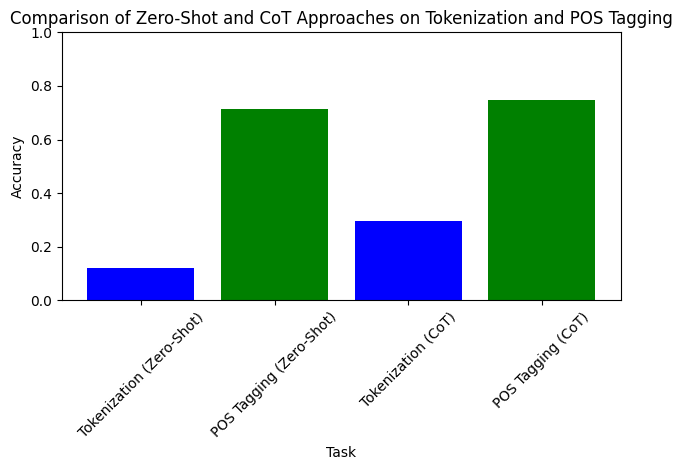

In [ ]:
def evaluate_approach(create_prompt_fn, task_name, is_pos_tagging=False):
    accuracies = []
    for sentence, tokens_pos in tqdm(list(parsed_data.items())[:200], desc=f"Computing {task_name} Accuracy"):
        if is_pos_tagging:
            tokens = [token for token in tokens_pos.keys()]
            pos_tags = [pos for pos in tokens_pos.values()]
            reference = ", ".join(pos_tags)
        else:
            tokens = [token for token in tokens_pos.keys()]
            reference = ", ".join(tokens)

        prompt = create_prompt_fn(sentence, tokens if is_pos_tagging else sentence)
        response = query_gpt4(prompt)
        if response:
            accuracy = calculate_accuracy(reference, response)
            accuracies.append(accuracy)

    return sum(accuracies) / len(accuracies) if accuracies else 0


tokenization_accuracy_zero_shot = evaluate_approach(create_tokenization_prompt_zero_shot, "Tokenization")
print(f"Tokenization Accuracy (Zero-Shot): {tokenization_accuracy_zero_shot:.2f}")

pos_tagging_accuracy_zero_shot = evaluate_approach(create_pos_prompt_zero_shot, "POS Tagging", is_pos_tagging=True)
print(f"POS Tagging Accuracy (Zero-Shot): {pos_tagging_accuracy_zero_shot:.2f}")

tokenization_accuracy_cot = evaluate_approach(create_tokenization_prompt_cot, "Tokenization")
print(f"Tokenization Accuracy (CoT): {tokenization_accuracy_cot:.2f}")

pos_tagging_accuracy_cot = evaluate_approach(create_pos_prompt_cot, "POS Tagging", is_pos_tagging=True)
print(f"POS Tagging Accuracy (CoT): {pos_tagging_accuracy_cot:.2f}")

tasks = ['Tokenization (Zero-Shot)', 'POS Tagging (Zero-Shot)', 'Tokenization (CoT)', 'POS Tagging (CoT)']
accuracies = [tokenization_accuracy_zero_shot, pos_tagging_accuracy_zero_shot, tokenization_accuracy_cot, pos_tagging_accuracy_cot]

plt.bar(tasks, accuracies, color=['blue', 'green', 'blue', 'green'])
plt.xlabel('Task')
plt.ylabel('Accuracy')
plt.title('Comparison of Zero-Shot and CoT Approaches on Tokenization and POS Tagging')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correct the way tokenization accuracy is calculated
It was calculated using in a way that once a word is tokenized wrong in a sequence, the rest of the sentence will be counted as wrong because of the order. The following way of calculating tokenization accuracy is using a set and simply compare the difference without sequence order being an issue.

Computing (Corrected) Tokenization Accuracy: 100%|██████████| 200/200 [54:36<00:00, 16.38s/it]


Overall Tokenization Accuracy (Prompt 1 - Standard): 0.7964677823333627
Overall Tokenization Accuracy (Prompt 2 - Zero-Shot): 0.388402506052171
Overall Tokenization Accuracy (Prompt 3 - COT): 0.7473435141518844


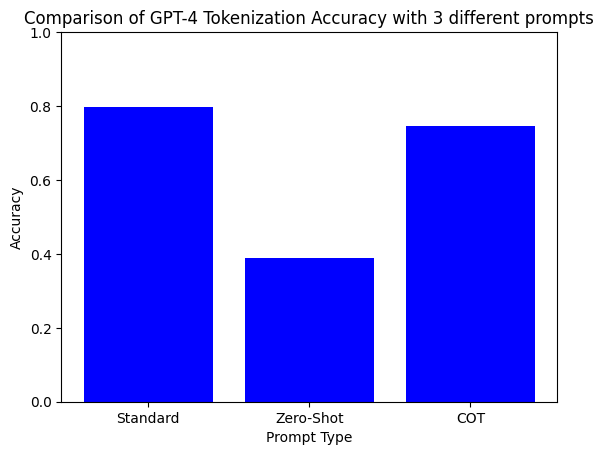

In [ ]:
accuracy_standard = []
accuracy_zero_shot = []
accuracy_cot = []

for sentence, tokens_pos in tqdm(list(parsed_data.items())[:200], desc="Computing (Corrected) Tokenization Accuracy"):
    reference_tokens = set(tokens_pos.keys())

    # Prompt 1 - Standard prompt
    prompt_standard = create_tokenization_prompt(sentence)
    response_standard = query_gpt4(prompt_standard)
    if response_standard:
        predicted_tokens_standard = set(response_standard.split(", "))
        correct_tokens_standard = reference_tokens.intersection(predicted_tokens_standard)
        accuracy_standard.append(len(correct_tokens_standard) / len(reference_tokens))

    # Prompt 2 - Zero-shot prompt
    prompt_zero_shot = create_tokenization_prompt_zero_shot(sentence)
    response_zero_shot = query_gpt4(prompt_zero_shot)
    if response_zero_shot:
        predicted_tokens_zero_shot = set(response_zero_shot.split(", "))
        correct_tokens_zero_shot = reference_tokens.intersection(predicted_tokens_zero_shot)
        accuracy_zero_shot.append(len(correct_tokens_zero_shot) / len(reference_tokens))

    # Prompt 3 - COT prompt
    prompt_cot = create_tokenization_prompt_cot(sentence)
    response_cot = query_gpt4(prompt_cot)
    if response_cot:
        predicted_tokens_cot = set(response_cot.split(", "))
        correct_tokens_cot = reference_tokens.intersection(predicted_tokens_cot)
        accuracy_cot.append(len(correct_tokens_cot) / len(reference_tokens))

# Calculate overall accuracies
overall_accuracy_standard = sum(accuracy_standard) / len(accuracy_standard) if accuracy_standard else 0
overall_accuracy_zero_shot = sum(accuracy_zero_shot) / len(accuracy_zero_shot) if accuracy_zero_shot else 0
overall_accuracy_cot = sum(accuracy_cot) / len(accuracy_cot) if accuracy_cot else 0

print("Overall Tokenization Accuracy (Prompt 1 - Standard):", overall_accuracy_standard)
print("Overall Tokenization Accuracy (Prompt 2 - Zero-Shot):", overall_accuracy_zero_shot)
print("Overall Tokenization Accuracy (Prompt 3 - COT):", overall_accuracy_cot)

tasks = ['Standard', 'Zero-Shot', 'COT']
accuracies = [overall_accuracy_standard, overall_accuracy_zero_shot, overall_accuracy_cot]

plt.bar(tasks, accuracies, color=['blue', 'blue', 'blue'])
plt.xlabel('Prompt Type')
plt.ylabel('Accuracy')
plt.title('Comparison of GPT-4 Tokenization Accuracy with 3 different prompts')
plt.ylim(0, 1)
plt.show()


# Try out Jieba's CWS Accuracy

In [ ]:
import jieba


sentence = "大多數的加長型禮車則是租車公司的財產。" # "大", "多數", "的", "加長", "型", "禮車", "則是", "租車", "公司", "的", "財產", "。"
tokens = jieba.cut(sentence, cut_all=False)
token_list = list(tokens)
print("Tokenized sentence:", token_list)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.866 seconds.
DEBUG:jieba:Loading model cost 0.866 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


Tokenized sentence: ['大多', '數的', '加長', '型', '禮車則', '是', '租車', '公司', '的', '財產', '。']


In [ ]:
# Tokenization Accuracy Calculation using Jieba
def calculate_accuracy(reference_tokens: set, predicted_tokens: set) -> float:
    correct_tokens = reference_tokens.intersection(predicted_tokens)
    return len(correct_tokens) / len(reference_tokens) if reference_tokens else 0

tokenization_accuracy = []
for sentence, tokens_pos in tqdm(list(parsed_data.items())[:200], desc="Computing Tokenization Accuracy with Jieba"):
    reference_tokens = set(tokens_pos.keys())
    predicted_tokens = set(jieba.cut(sentence, cut_all=False))
    accuracy = calculate_accuracy(reference_tokens, predicted_tokens)
    tokenization_accuracy.append(accuracy)


average_accuracy = sum(tokenization_accuracy) / len(tokenization_accuracy)
print(f"Average Tokenization Accuracy with Jieba: {average_accuracy:.4f}")

Computing Tokenization Accuracy with Jieba: 100%|██████████| 200/200 [00:00<00:00, 3236.06it/s]

Average Tokenization Accuracy with Jieba: 0.7488
